In [1]:
%matplotlib inline
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.spatial import distance 
from collections import defaultdict
from scipy.cluster import hierarchy

In [2]:
K = nx.read_edgelist('dblp.txt',create_using=nx.Graph(),nodetype=int)
print(nx.info(K))

Name: 
Type: Graph
Number of nodes: 8149
Number of edges: 10000
Average degree:   2.4543


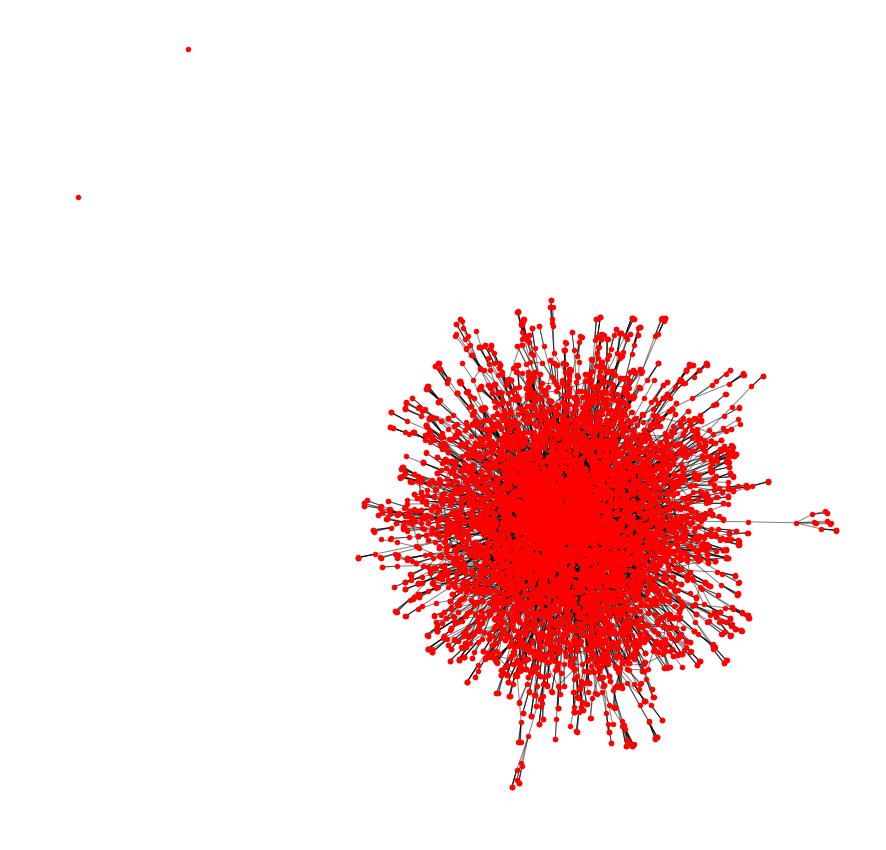

In [3]:
pos = nx.fruchterman_reingold_layout(K);
plt.figure(figsize=(15,15));
plt.axis("off");
nx.draw_networkx_nodes(K, pos, node_size=20)
nx.draw_networkx_edges(K, pos, alpha=0.500)
plt.show()

In [4]:
_SQRT2 = np.sqrt(2) 
def hellinger3(p, q):
    return np.sqrt(np.sum((np.sqrt(p) - np.sqrt(q)) ** 2)) / _SQRT2

In [5]:
labels=K.nodes()
path_length=dict(nx.all_pairs_shortest_path_length(K))
n = len(K)
distances=np.zeros((n,n))   
for u,p in path_length.items():
    for v,d in p.items():
        if((u < n and u in K.nodes()) and (v  < n and v in K.nodes())):
            distances[u][v] = d
            distances[v][u] = d
            if u==v: distances[u][u]=0
Y = distance.pdist(distances,hellinger3)
Z = hierarchy.average(Y)
membership=list(hierarchy.fcluster(Z,t=1.15))
partition = defaultdict(list)
for n,p in zip(list(range(len(K))),membership):
    if(p in partition):
        partition[p].append(labels[n])

In [6]:
partitions = {}
for i in range(len(membership)):
    partitions[i]=membership[i]

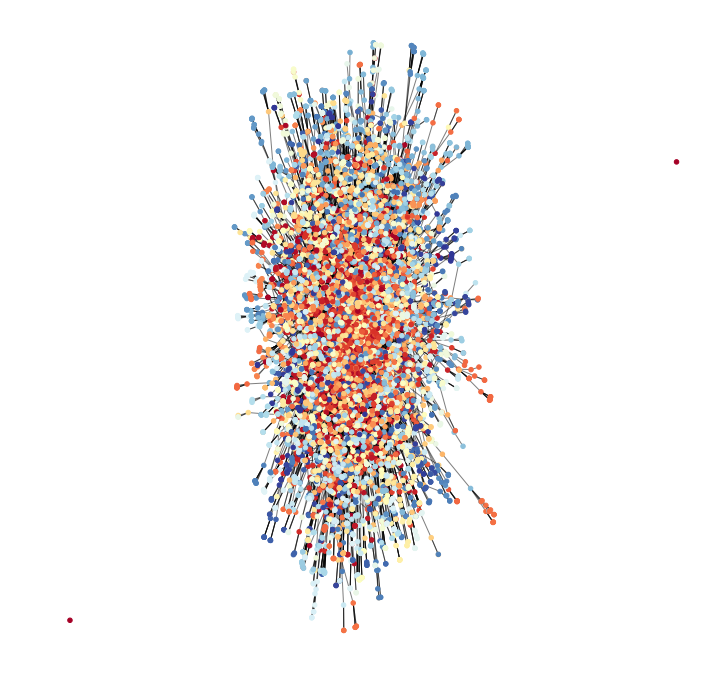

In [7]:
pos = nx.fruchterman_reingold_layout(K);
plt.figure(figsize=(12,12))
nx.draw_networkx_nodes(K, pos, cmap=plt.cm.RdYlBu, node_color=list(partitions.values()), node_size=20)
nx.draw_networkx_edges(K, pos, alpha=0.5)
plt.axis('off')
plt.show()

In [8]:
print(type(Y))

<class 'numpy.ndarray'>


In [9]:
cw = nx.closeness_centrality(K)
bw = nx.betweenness_centrality(K, normalized=False)

In [10]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
def draw(G, pos, measures, measure_name):
    nodes = nx.draw_networkx_nodes(G, pos, node_size=15, 
            cmap=plt.cm.plasma, node_color=list(measures.values()), 
            nodelist=list(measures.keys()))
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    edges = nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

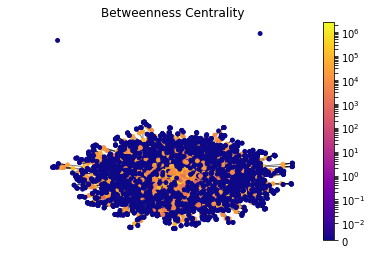

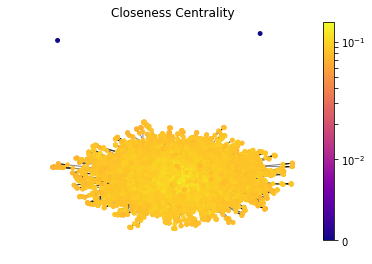

In [11]:
pos = nx.spring_layout(K)
draw(K, pos, bw, 'Betweenness Centrality')
draw(K, pos, cw, 'Closeness Centrality')

In [12]:
communities = {}
for i in partitions.keys():
    if partitions[i] not in communities:
        communities[partitions[i]] = list()
        communities[partitions[i]].append(i)
    else:
        communities[partitions[i]].append(i)

In [14]:
test = communities[254]
G = nx.Graph()
for i in range(len(test)):
    G.add_node(test[i])
    neighbors = [n for n in K.neighbors(test[i])]
    for j in range(len(neighbors)):
        G.add_edge(test[i], neighbors[j])

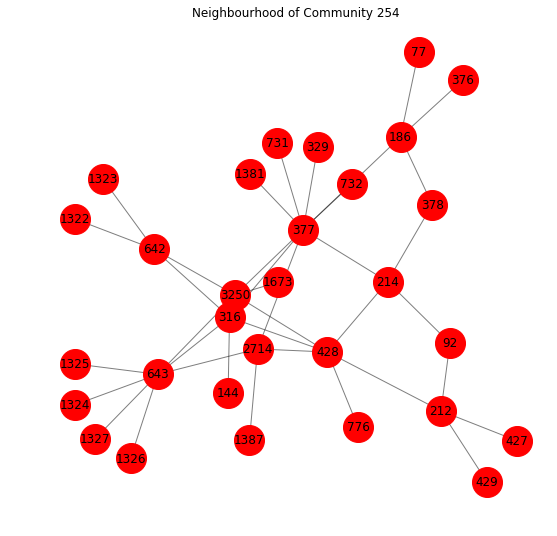

In [15]:
pos = nx.fruchterman_reingold_layout(G);
plt.figure(figsize=(9,9));
plt.axis("off");
nx.draw_networkx_nodes(G, pos, node_size=900)
nx.draw_networkx_edges(G, pos, alpha=0.500)
nx.draw_networkx_labels(G,pos)
plt.title("Neighbourhood of Community 254")
plt.show()

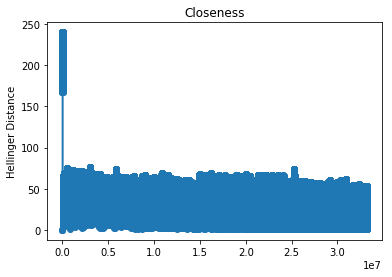

In [19]:
x = list()
for i in range(len(Y)):
    x.append(i)
plt.plot(x,Y,'-o')
plt.ylabel('Hellinger Distance')
plt.title('Closeness')
plt.show()

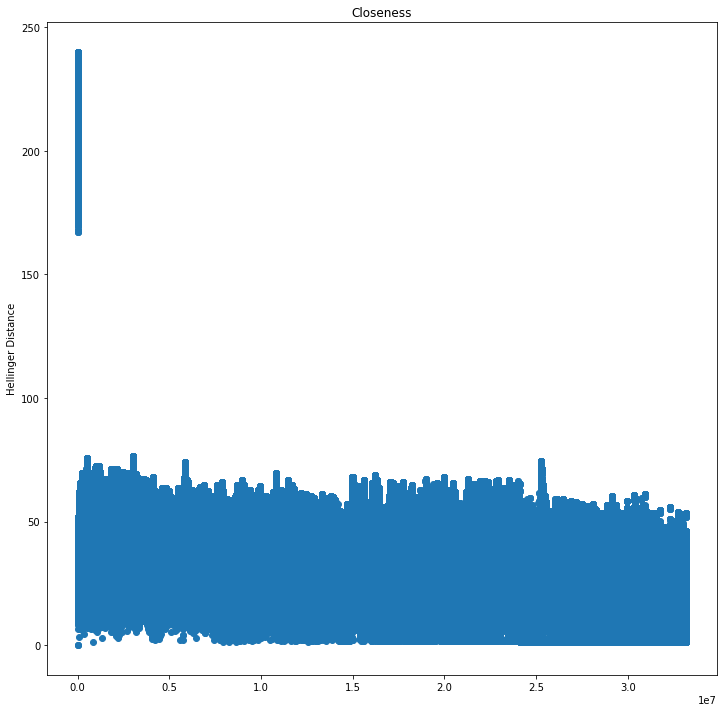

In [35]:
x1 = list()
y =  list()
for i in range(200):
    x1.append(i)
    y.append(Y[i])
plt.figure(figsize=(12,12))
plt.scatter(x,Y)
plt.ylabel('Hellinger Distance')
plt.title('Closeness')
plt.show()